    05-regression_classification_bitcoin value prediction

In [3]:
import pandas as pd

df = pd.read_excel('bitcoin_dataset.xlsx')

df


,Open,High,Low,Close,Volume,MA 20,MA 20 close,STD 10 high,PP 10 vol,SMA_20,SMA_50,RSI,MACD,MACD_Signal,Close_Predictions,Command
0,5360.33,5365.42,4442.12,5028.97,227276.922760,0.000000,0.0000,0.000000,0.00000,0.0000,0.0000,0.000000,0.000000,0.000000,5312.64,buy
1,5028.86,5525.00,4921.45,5312.64,150089.926318,0.000000,0.0000,0.000000,0.00000,0.0000,0.0000,0.000000,22.628946,4.525789,5393.04,buy
2,5312.64,5436.17,5009.37,5393.04,137127.634894,0.000000,0.0000,0.000000,0.00000,0.0000,0.0000,0.000000,46.513972,12.923426,6162.37,buy
3,5393.26,6400.00,5252.53,6162.37,199020.873439,0.000000,0.0000,0.000000,0.00000,0.0000,0.0000,0.000000,126.068293,35.552399,6208.36,buy
4,6162.05,6900.00,5670.00,6208.36,219298.329514,0.000000,0.0000,0.000000,0.00000,0.0000,0.0000,0.000000,190.629218,66.567763,6186.98,buy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,68124.20,68541.10,67861.10,68313.27,19872.897430,58821.762625,59254.1505,2768.770800,112823.88387,59254.1505,50647.4616,78.680957,5052.281753,4456.030255,68955.88,sell
1455,68313.28,69887.61,68094.75,68955.88,38404.668350,59661.429375,60113.2080,2782.361622,112823.88387,60113.2080,51192.6584,79.027233,5093.089093,4583.442022,72078.10,sell
1456,68955.88,72800.00,67024.96,72078.10,75292.825726,60574.929500,61104.1720,2931.868199,112823.88387,61104.1720,51802.6138,79.288690,5316.085736,4729.970765,71452.01,sell
1457,72078.10,73000.00,68620.82,71452.01,68783.546691,61550.566000,62084.3030,2622.883729,112823.88387,62084.3030,52440.2936,75.636353,5380.271532,4860.030918,73072.41,sell


    Standardization of each inputs and outputs.

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

bitcoin_data = pd.read_excel("bitcoin_dataset.xlsx")

numeric_columns = bitcoin_data.select_dtypes(include=['float64', 'int64']).columns

# Standardize numeric columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(bitcoin_data[numeric_columns])
scaled_df = pd.DataFrame(scaled_data, columns=[col+"_scaled" for col in numeric_columns])

merged_data = pd.concat([bitcoin_data, scaled_df], axis=1)

# Add original columns except scaled columns to new dataset
merged_data.drop(columns=numeric_columns, inplace=True)
merged_data.to_excel("scaled_bitcoin_dataset.xlsx", index=False)
merged_data


,Command,Open_scaled,High_scaled,Low_scaled,Close_scaled,Volume_scaled,MA 20_scaled,MA 20 close_scaled,STD 10 high_scaled,PP 10 vol_scaled,SMA_20_scaled,SMA_50_scaled,RSI_scaled,MACD_scaled,MACD_Signal_scaled,Close_Predictions_scaled
0,buy,-1.689640,-1.692192,-1.750942,-1.711737,1.342362,-2.037056,-2.036543,-1.138701,-1.051318,-2.036543,-1.998139,-2.879345,-0.170797,-0.172031,-1.693640
1,buy,-1.711551,-1.681936,-1.718236,-1.693017,0.554366,-2.037056,-2.036543,-1.138701,-1.051318,-2.036543,-1.998139,-2.879345,-0.155523,-0.168778,-1.688342
2,buy,-1.692792,-1.687645,-1.712237,-1.687712,0.422035,-2.037056,-2.036543,-1.138701,-1.051318,-2.036543,-1.998139,-2.879345,-0.139402,-0.162743,-1.637644
3,buy,-1.687463,-1.625699,-1.695645,-1.636943,1.053898,-2.037056,-2.036543,-1.138701,-1.051318,-2.036543,-1.998139,-2.879345,-0.085707,-0.146481,-1.634614
4,buy,-1.636645,-1.593563,-1.667160,-1.633908,1.260910,-2.037056,-2.036543,-1.138701,-1.051318,-2.036543,-1.998139,-2.879345,-0.042132,-0.124191,-1.636022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,sell,2.459169,2.368158,2.576327,2.464447,-0.775011,1.898055,1.921040,1.624350,0.124872,1.921040,1.389594,1.345209,3.239234,3.030338,2.500370
1455,sell,2.471668,2.454699,2.592270,2.506853,-0.585821,1.954228,1.978417,1.637913,0.124872,1.978417,1.426062,1.363801,3.266777,3.121904,2.706120
1456,sell,2.514145,2.641880,2.519275,2.712891,-0.209232,2.015340,2.044603,1.787110,0.124872,2.044603,1.466861,1.377840,3.417288,3.227208,2.664861
1457,sell,2.720529,2.654735,2.628165,2.671575,-0.275685,2.080609,2.110066,1.478764,0.124872,2.110066,1.509514,1.181738,3.460610,3.320677,2.771644


    Plots (barhcarts, scatter) that describe the behavior of input data versus output data.

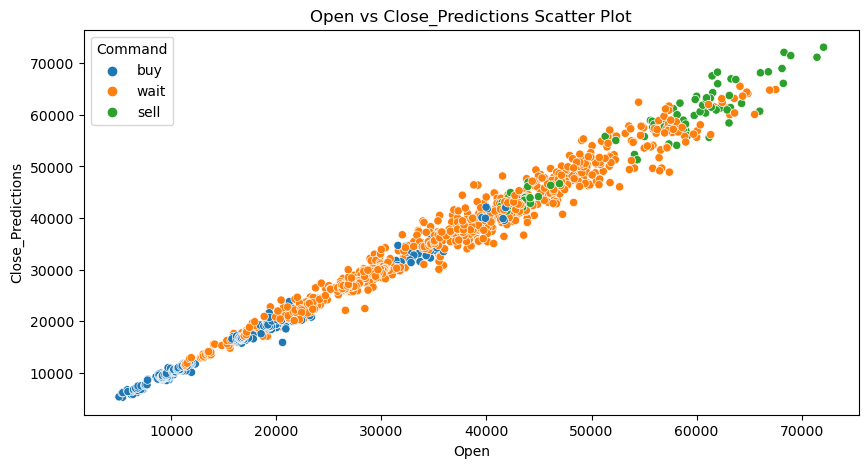

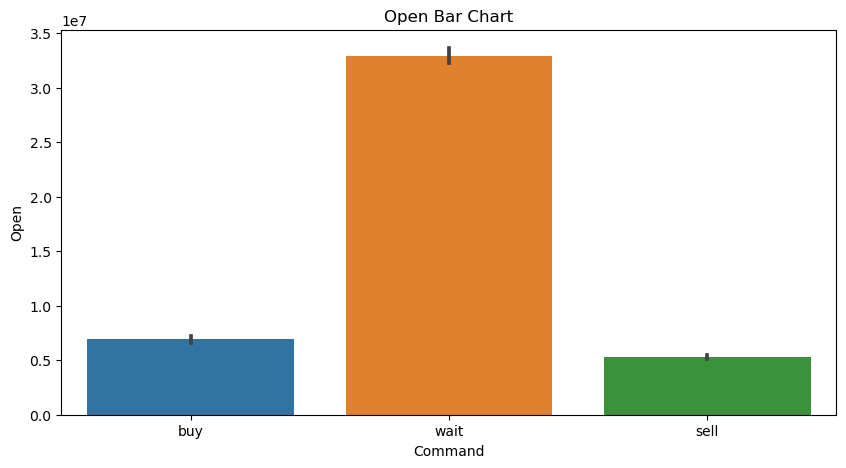

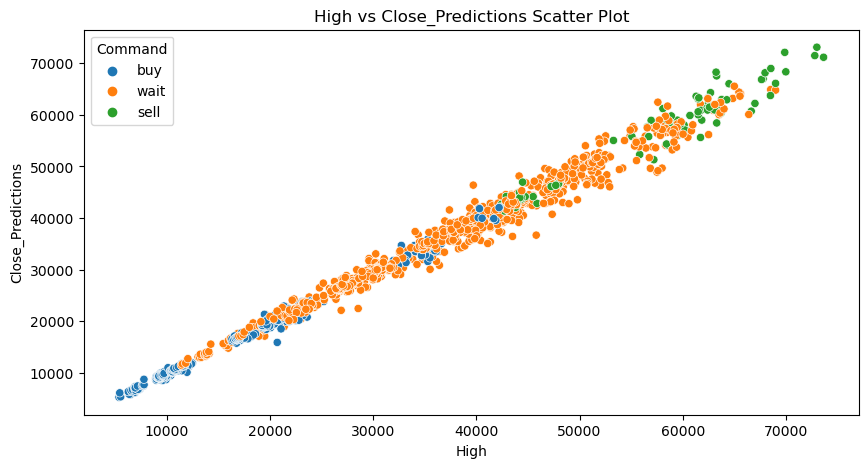

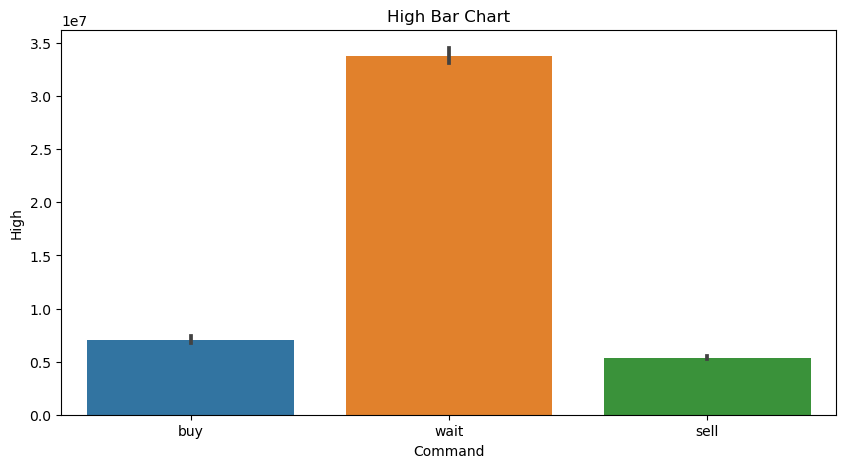

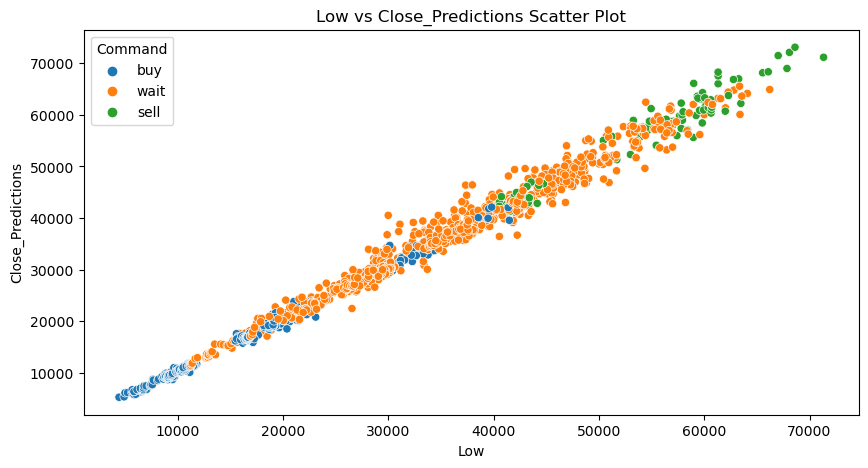

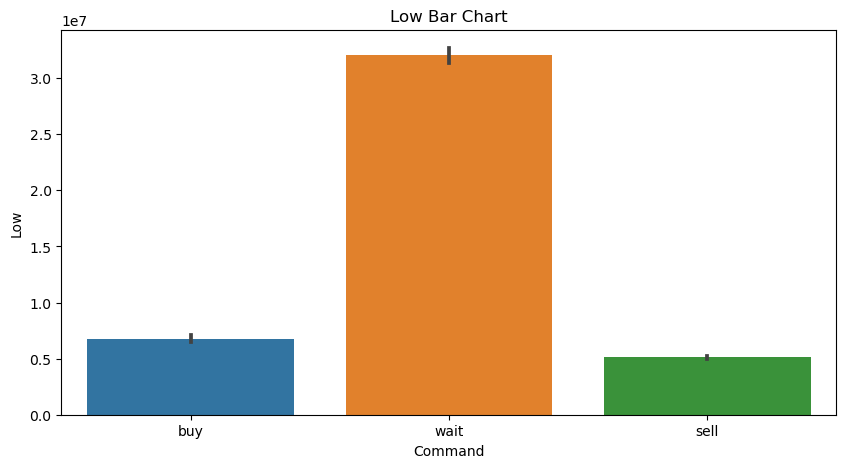

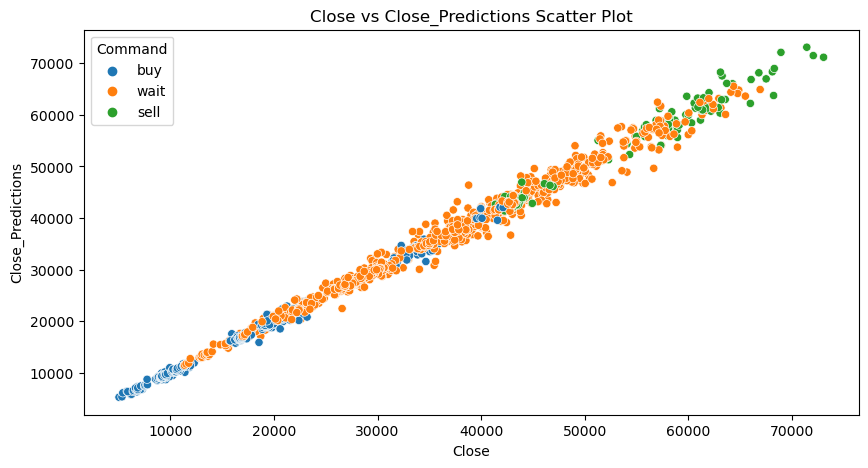

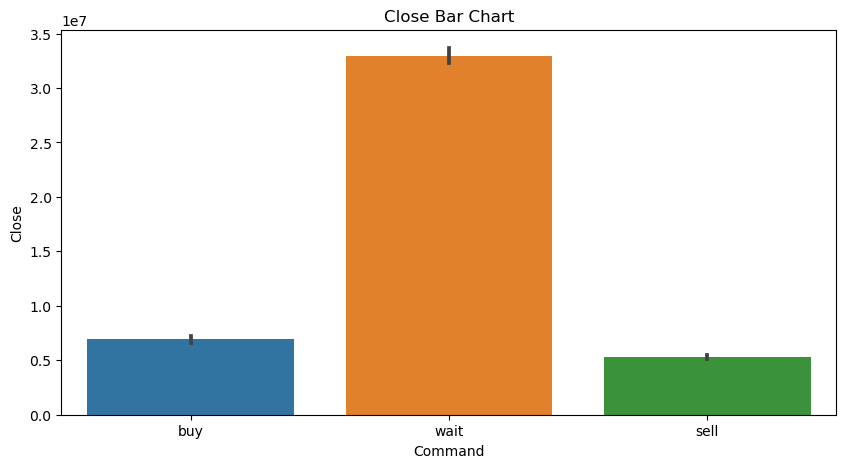

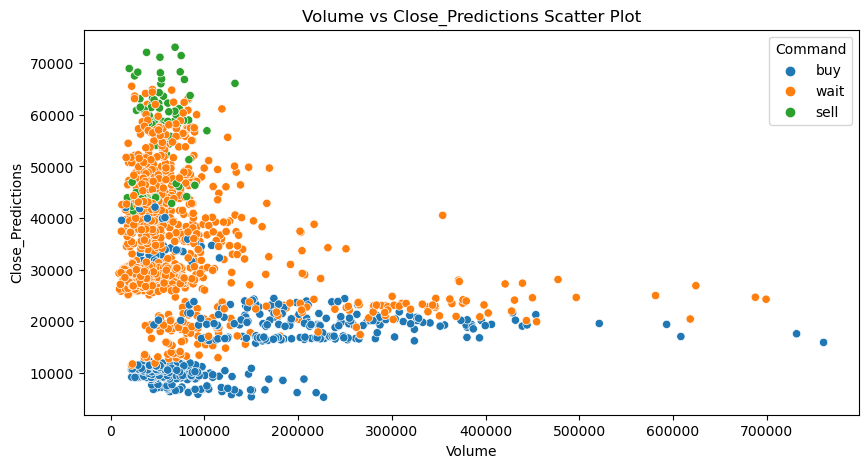

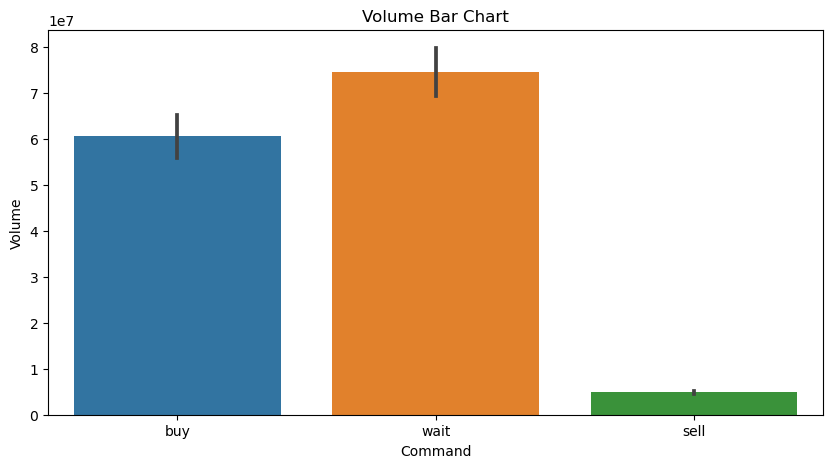

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

bitcoin_data = pd.read_excel("bitcoin_dataset.xlsx")

X = bitcoin_data[["Open", "High", "Low", "Close", "Volume"]] #en çok etkileyen input sütunları
y = bitcoin_data["Close_Predictions"]

for column in X.columns:
    
    # Scatter plot
    plt.figure(figsize=(10, 5))
    sns.scatterplot(data=bitcoin_data, x=column, y="Close_Predictions", hue="Command")
    plt.title(f"{column} vs Close_Predictions Scatter Plot")
    plt.xlabel(column)
    plt.ylabel("Close_Predictions")
    plt.show()


    # Bar chart
    plt.figure(figsize=(10, 5))
    sns.barplot(data=bitcoin_data, x="Command", y=column, estimator=sum)
    plt.title(f"{column} Bar Chart")
    plt.xlabel("Command")
    plt.ylabel(column)
    plt.show()


    Statistical information of each input and outputs of datasets.

In [1]:
import pandas as pd

bitcoin_data = pd.read_excel("bitcoin_dataset.xlsx")

# Separate input and output columns
X = bitcoin_data.drop(columns=["Close_Predictions", "Command"])
y = bitcoin_data[["Close_Predictions", "Command"]]

# extract statistical information
input_statistics = X.describe()
output_statistics = y.describe()

# Write the results
print("Input Data Statistics:")
print(input_statistics)
print("\nOutput Data Statistics:")
print(output_statistics)


Input Data Statistics:
               Open          High           Low         Close         Volume  \
count   1459.000000   1459.000000   1459.000000   1459.000000    1459.000000   
mean   30921.482015  31694.526217  30103.327601  30967.979918   95787.868620   
std    15133.351918  15564.507520  14660.684634  15158.814881   97987.055034   
min     5028.860000   5365.420000   4442.120000   5028.970000    8971.480680   
25%    19329.020000  19681.580000  18970.440000  19329.235000   39547.448661   
50%    29186.000000  29564.520000  28663.640000  29193.640000   59442.960360   
75%    42358.125000  43271.065000  41499.645000  42368.930000  103490.401369   
max    72078.100000  73650.250000  71333.310000  73072.410000  760705.362783   

              MA 20   MA 20 close  STD 10 high      PP 10 vol        SMA_20  \
count   1459.000000   1459.000000  1459.000000    1459.000000   1459.000000   
mean   30449.770640  30491.746996  1141.058322  100845.738010  30491.746996   
std    14953.055303

    Plot histogram, box-plot and violin plot of each column

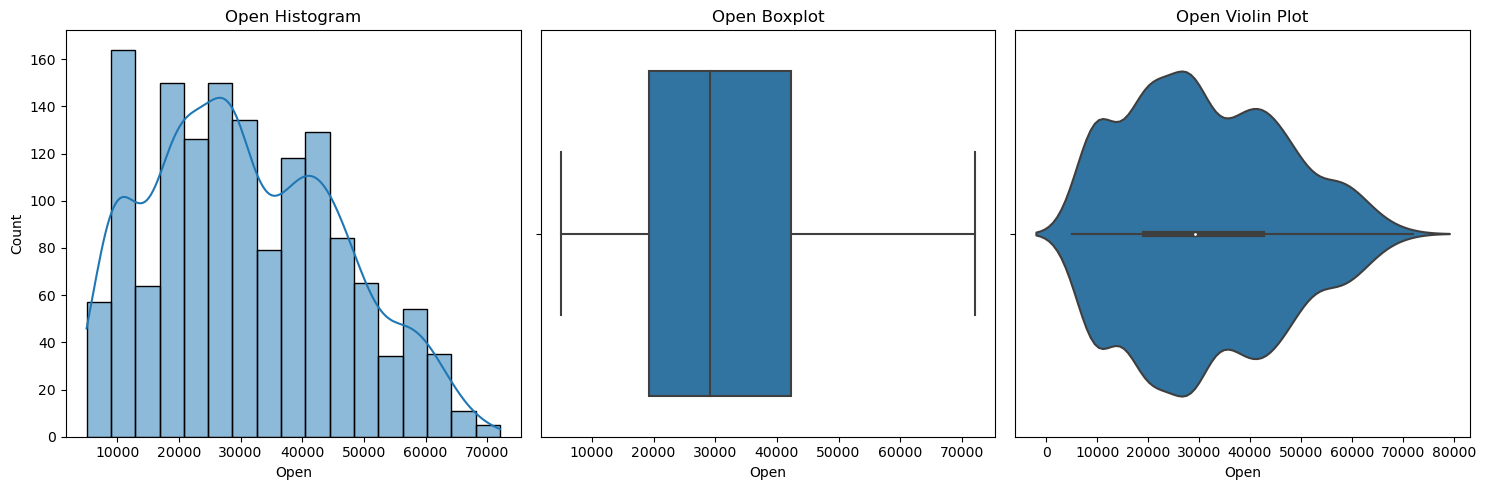

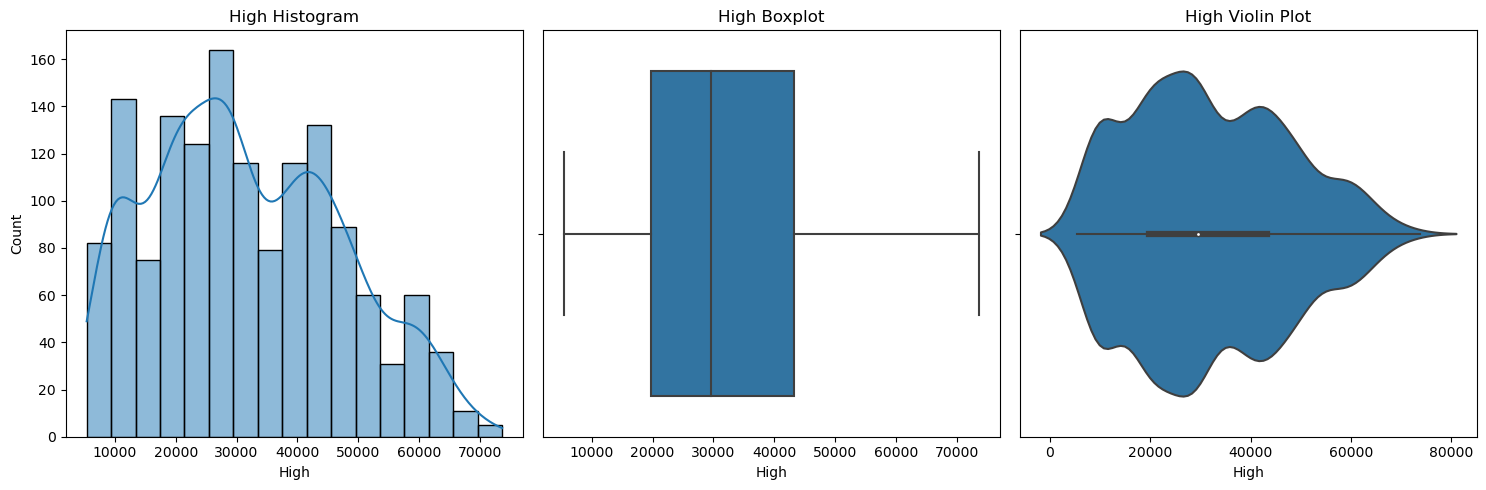

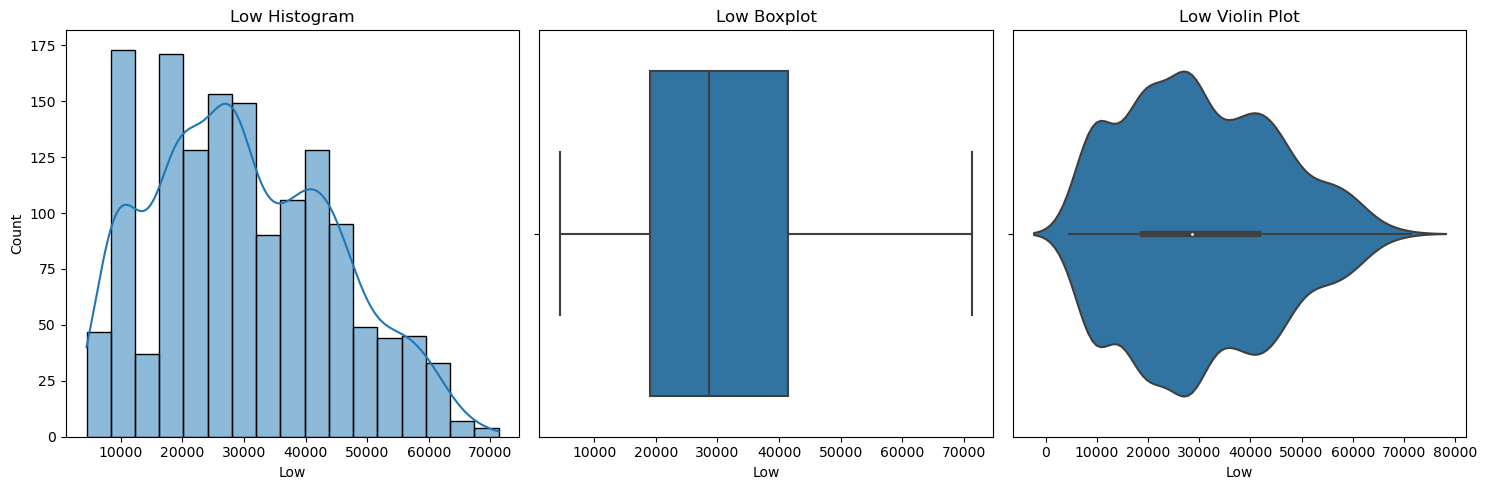

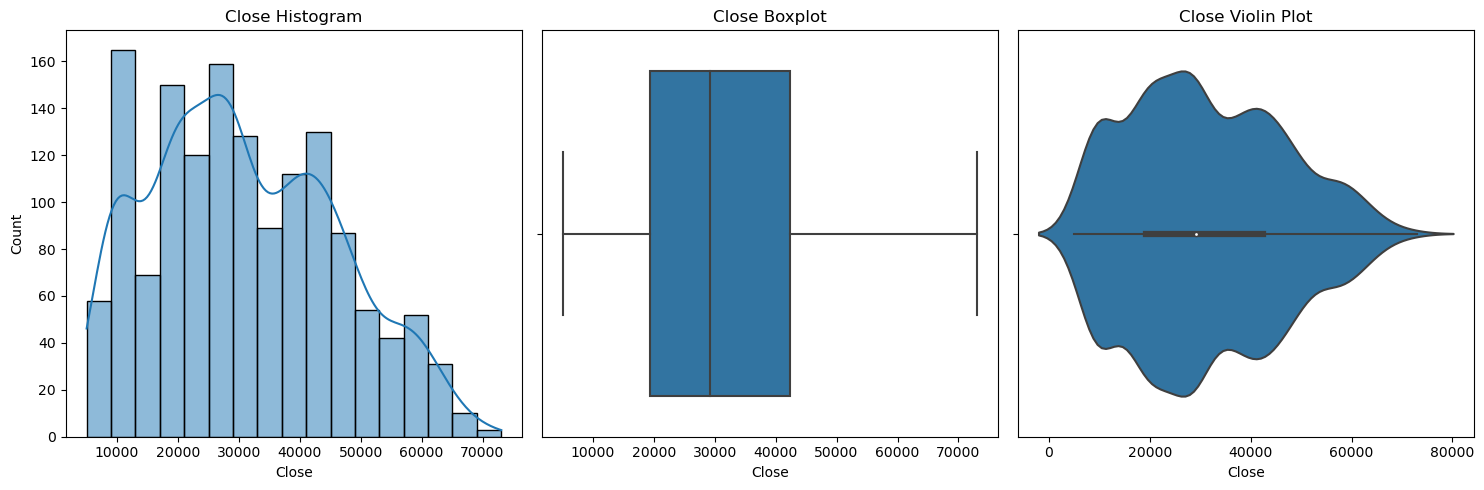

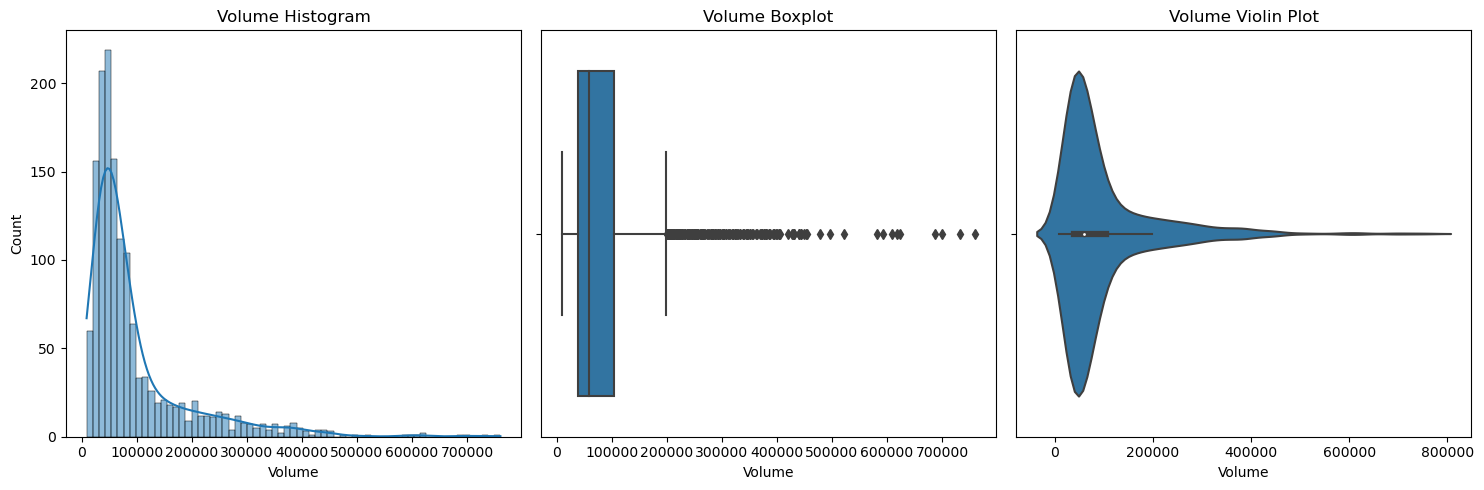

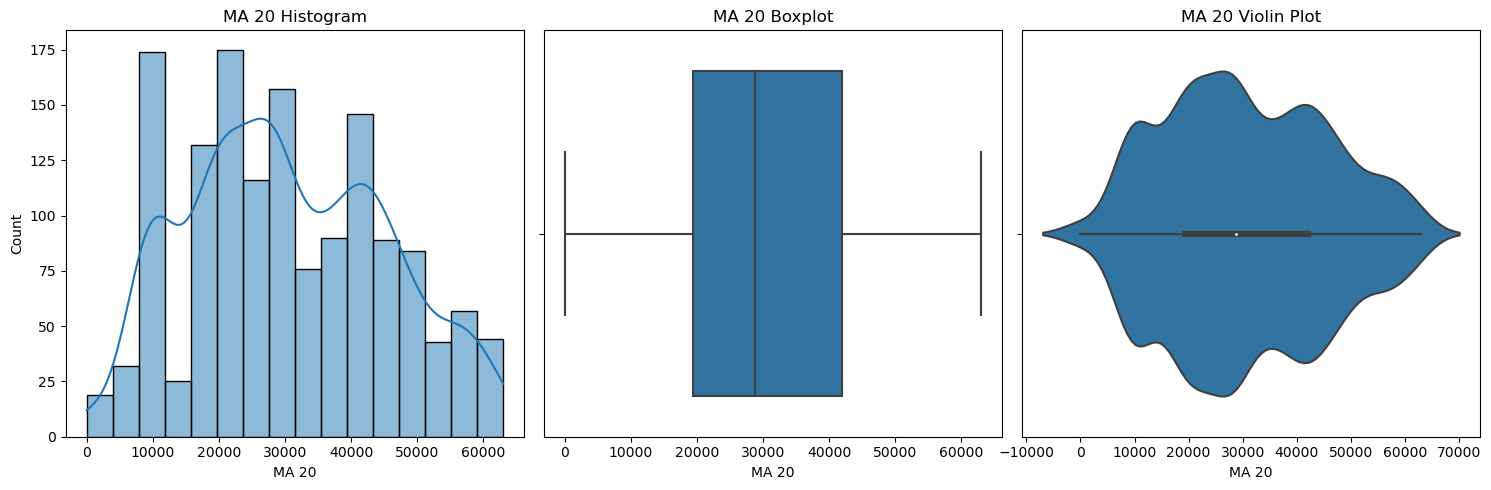

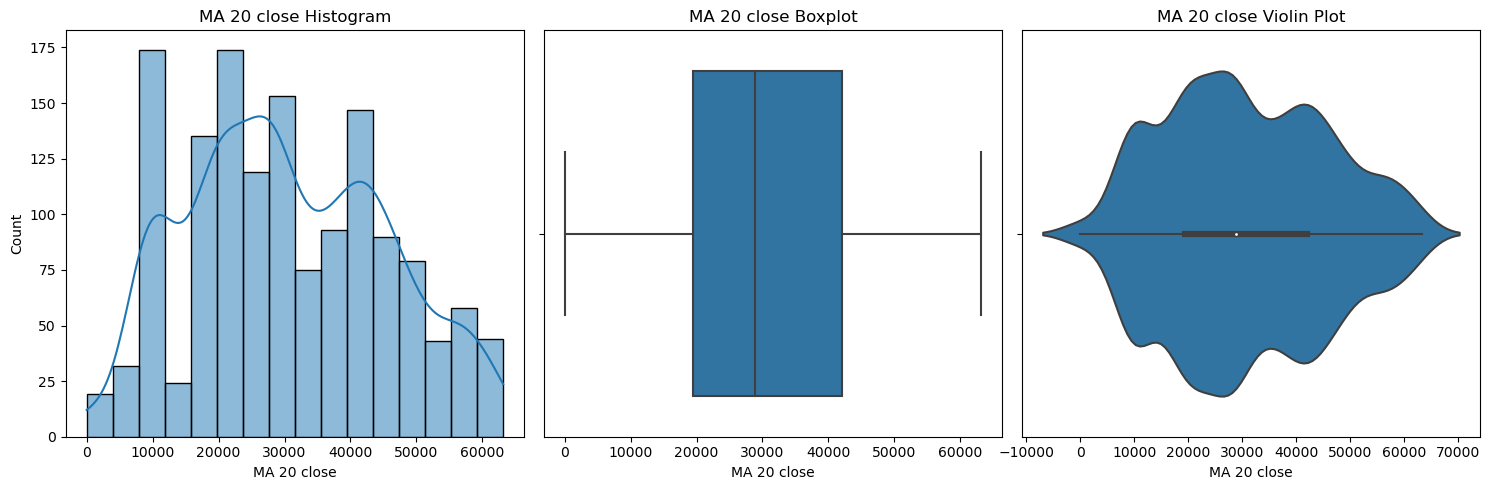

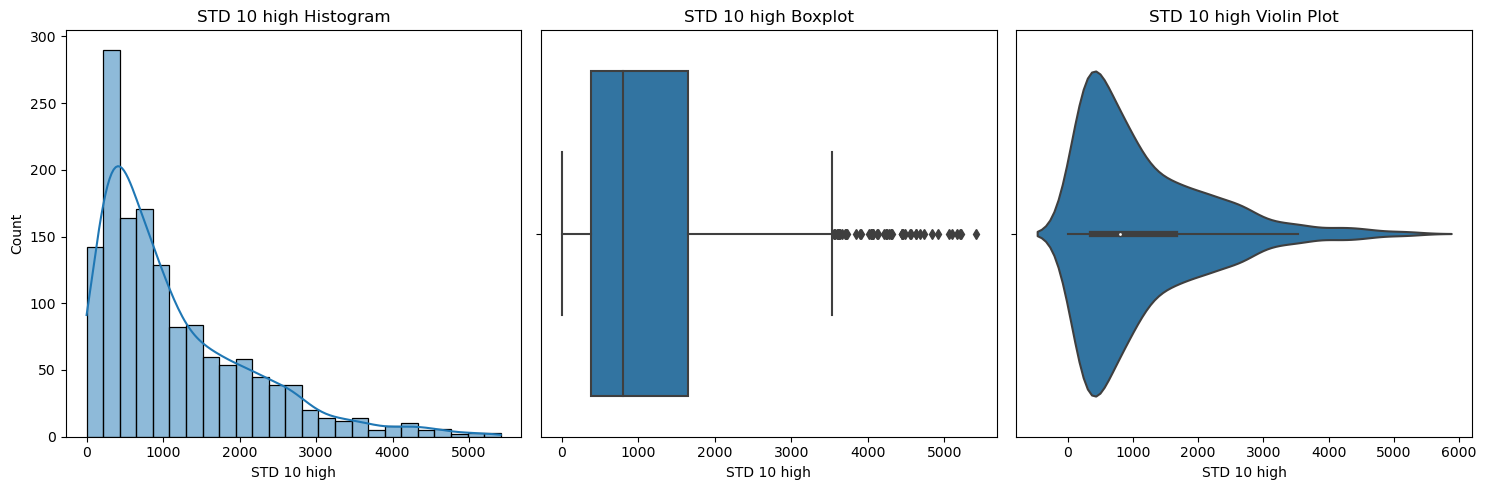

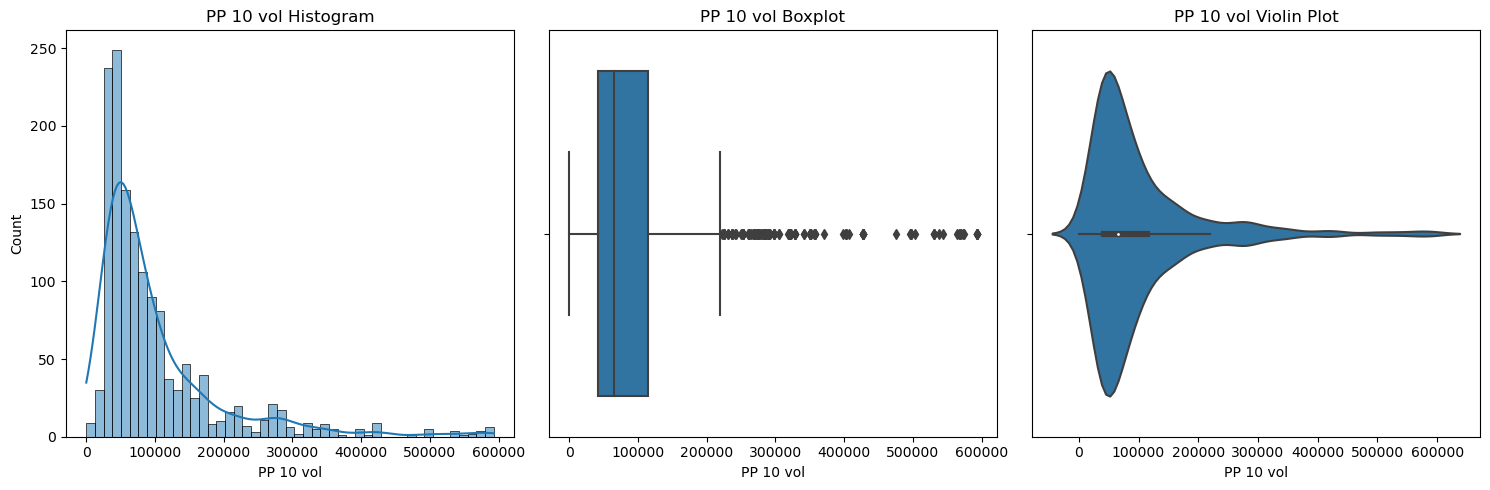

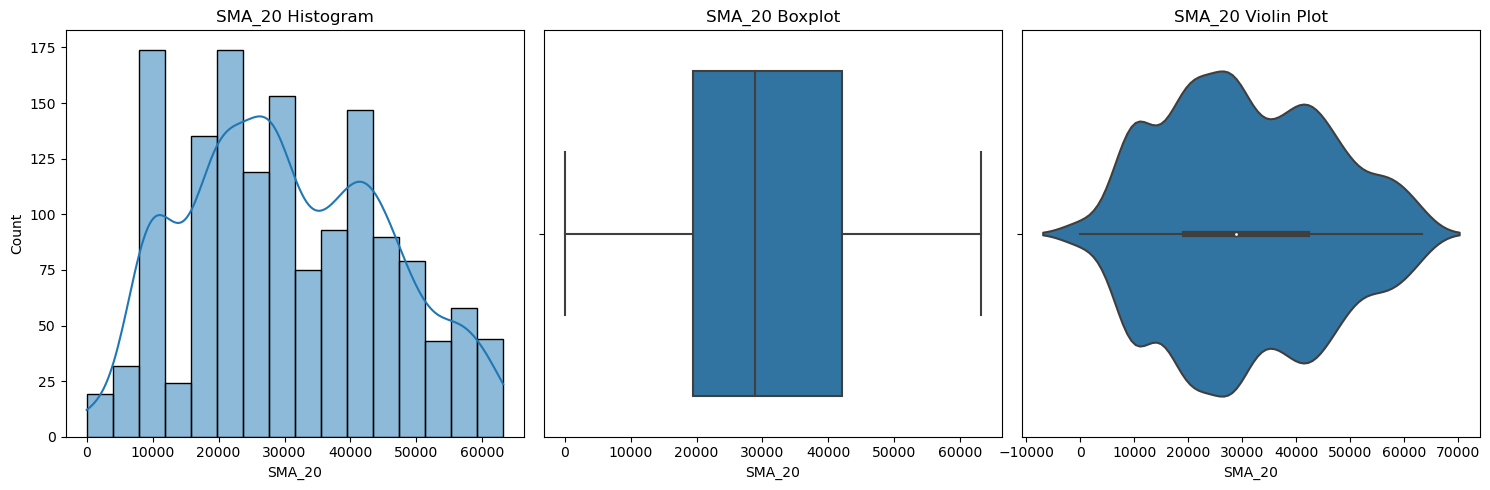

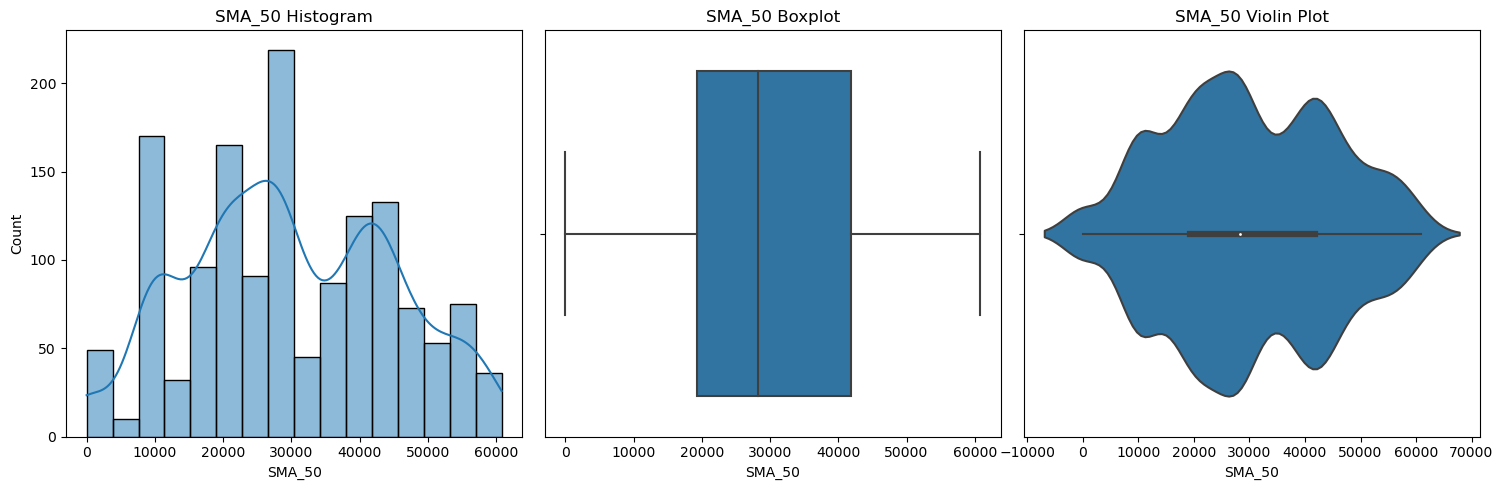

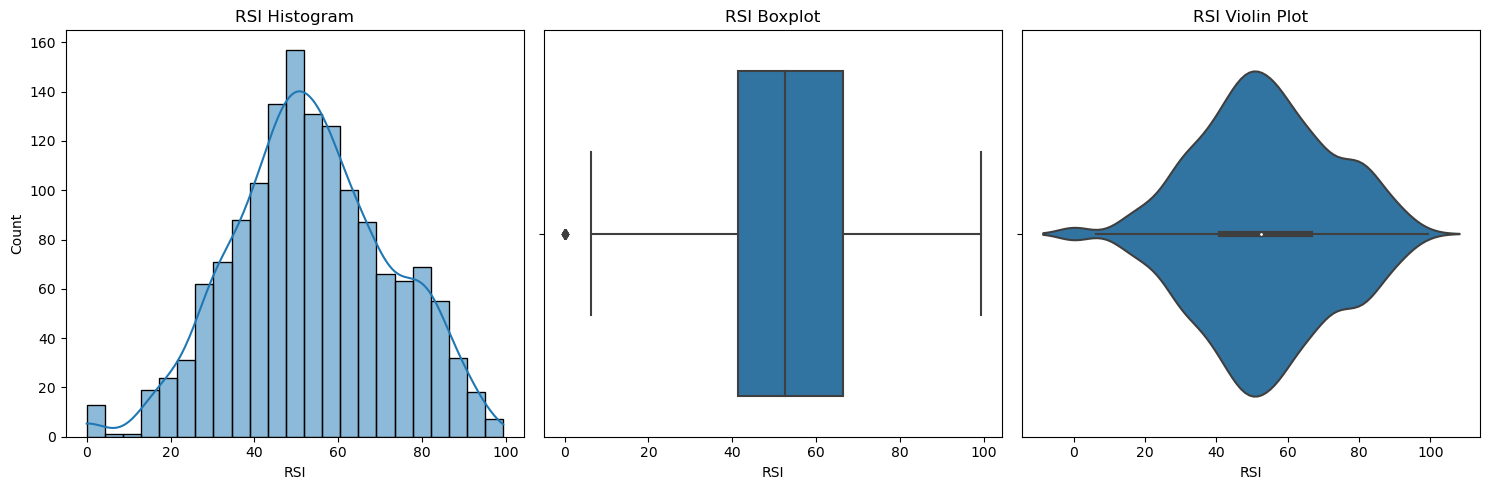

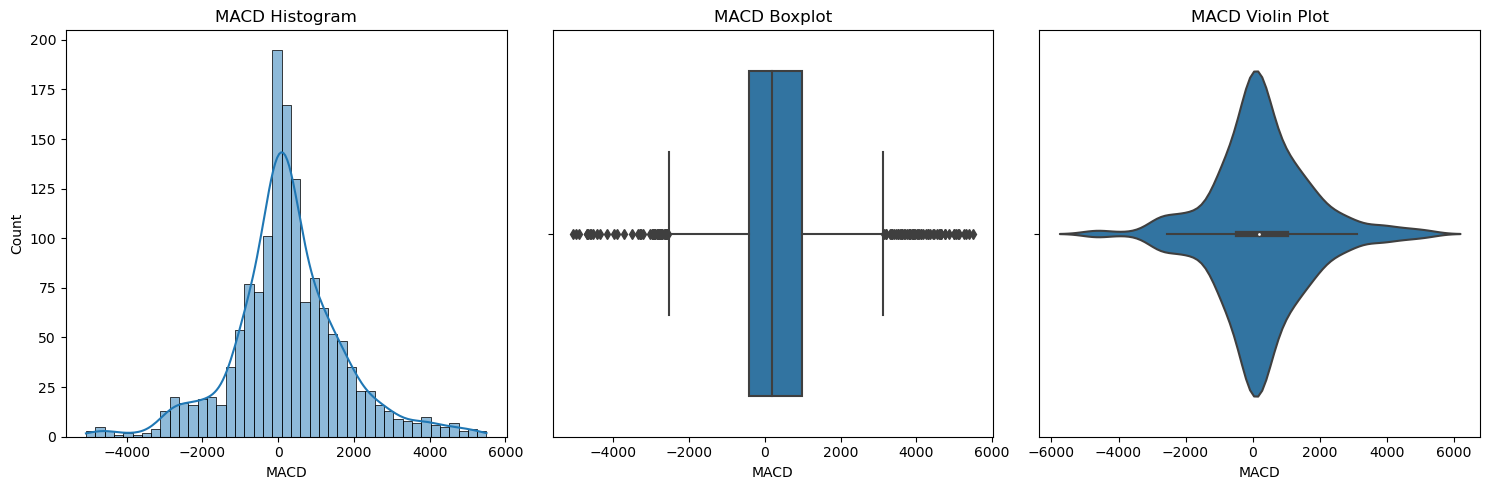

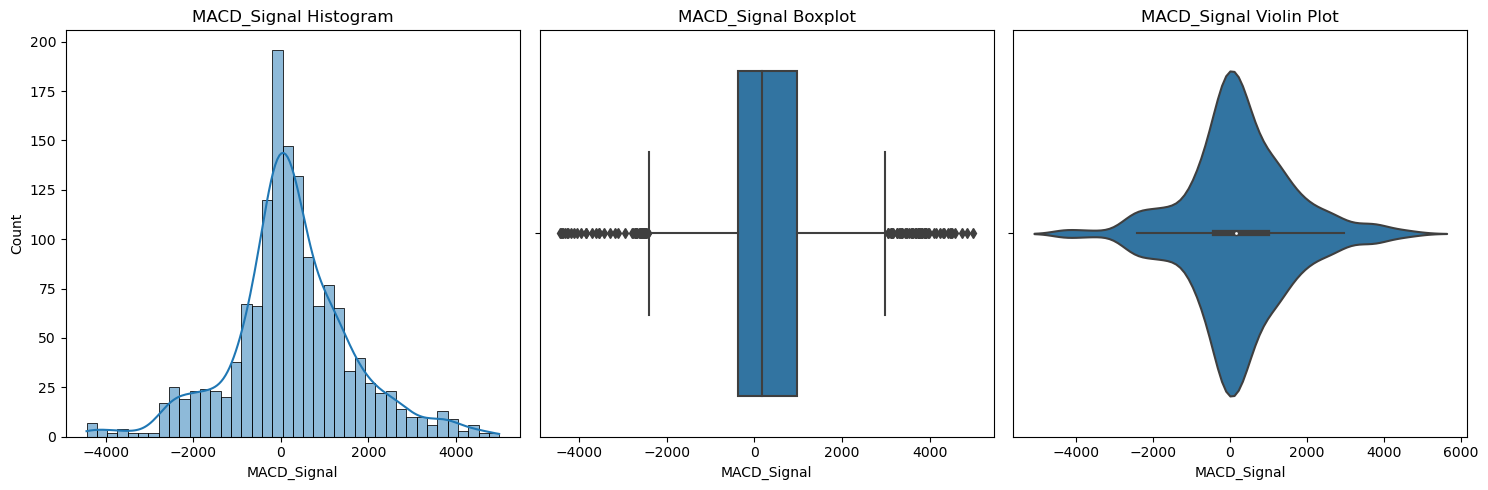

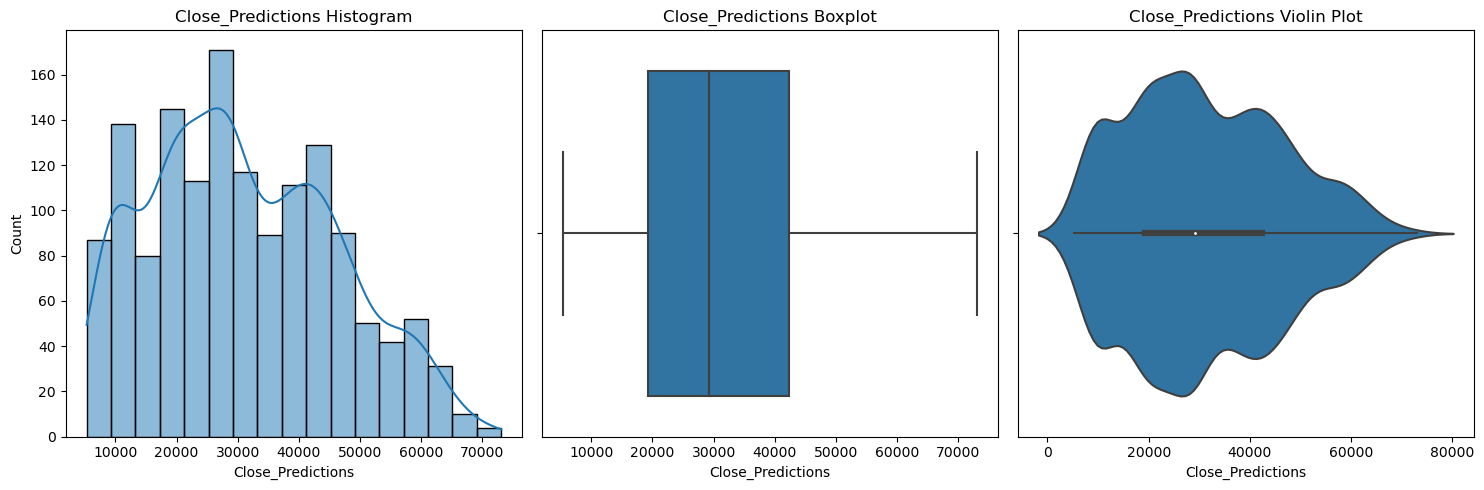

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

bitcoin_data = pd.read_excel("bitcoin_dataset.xlsx")

# Just selected the numeric columns
numeric_columns = bitcoin_data.select_dtypes(include=['float64', 'int64']).columns

for column in numeric_columns:
    plt.figure(figsize=(15, 5))

    # Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(data=bitcoin_data, x=column, kde=True)
    plt.title(f"{column} Histogram")

    # Box Plot
    plt.subplot(1, 3, 2)
    sns.boxplot(data=bitcoin_data, x=column)
    plt.title(f"{column} Boxplot")

    # Violin Plot
    plt.subplot(1, 3, 3)
    sns.violinplot(data=bitcoin_data, x=column)
    plt.title(f"{column} Violin Plot")

    plt.tight_layout()
    plt.show()


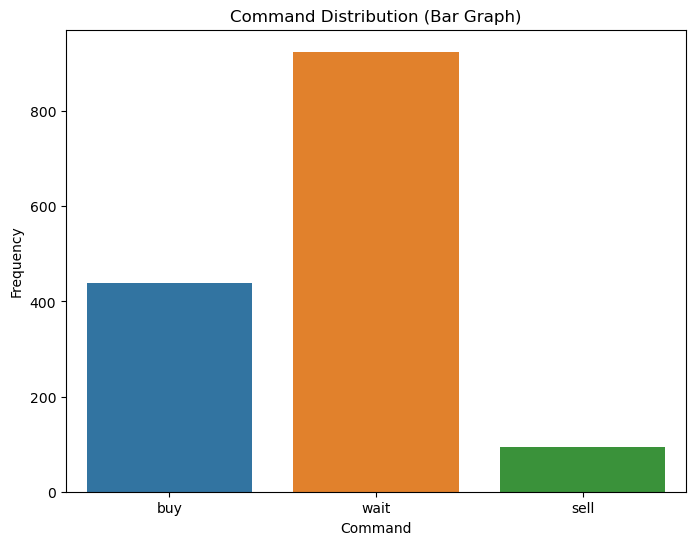

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

bitcoin_data = pd.read_excel("bitcoin_dataset.xlsx")

# Bar Chart
plt.figure(figsize=(8, 6))
sns.countplot(data=bitcoin_data, x='Command')
plt.title("Command Distribution (Bar Graph)")
plt.xlabel("Command")
plt.ylabel("Frequency")
plt.show()




    Normalized absolute cross-correlation map.

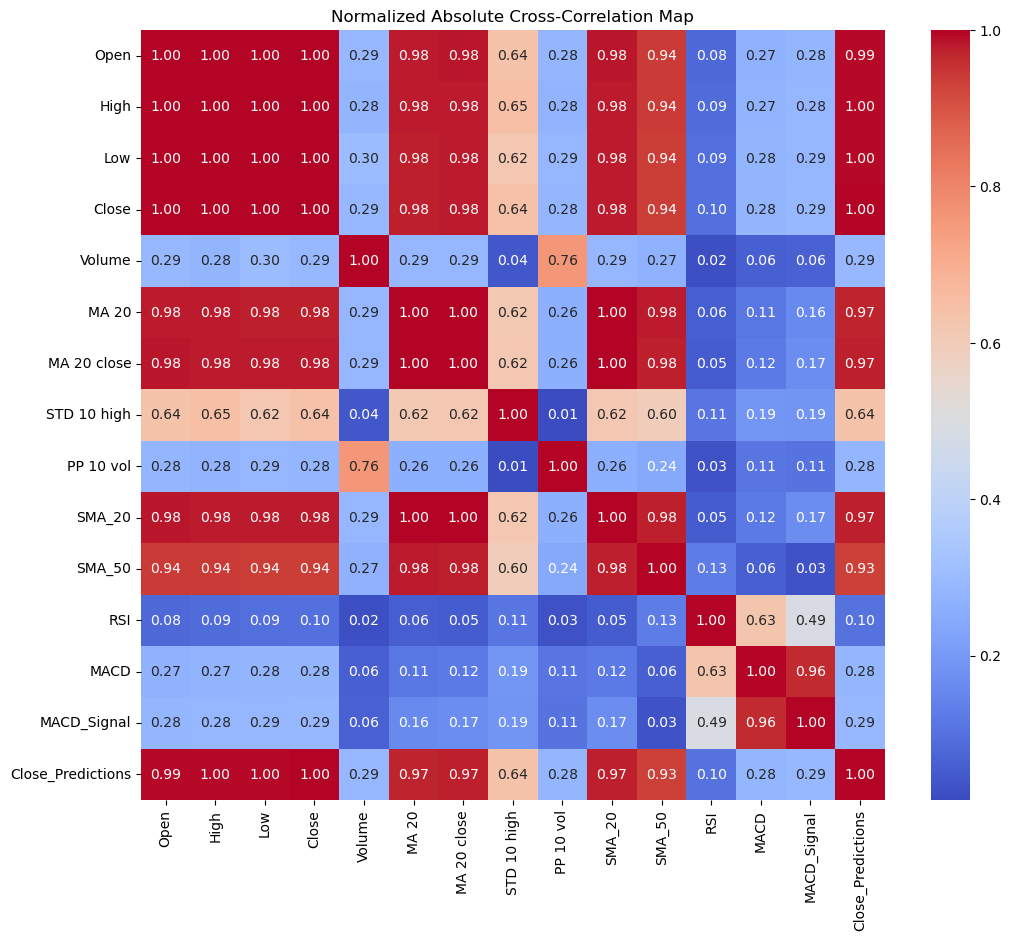

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

bitcoin_data = pd.read_excel("bitcoin_dataset.xlsx")

# Select numeric input columns and output column
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'MA 20', 'MA 20 close', 'STD 10 high', 'PP 10 vol', 'SMA_20', 'SMA_50', 'RSI', 'MACD', 'MACD_Signal']
output_column = 'Close_Predictions'

# Calculate the absolute cross-correlation matrix
correlation_matrix = bitcoin_data[numeric_columns + [output_column]].corr().abs()

# Normalize the correlation matrix
correlation_matrix /= correlation_matrix.max()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Normalized Absolute Cross-Correlation Map")
plt.show()


    Machine Learning and Performance

    Model training and performance metrics for "Close_Prediction" output column (regression)

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import joblib

data = pd.read_excel("scaled_bitcoin_dataset.xlsx")

# Separate input and output columns
X = data.drop(["Close_Predictions_scaled", "Command"], axis=1)
y = data["Close_Predictions_scaled"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

# Regression models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}

for name, model in models.items():
    # Cross-validation 
    cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='r2')
    print(f"Model: {name}")
    #print(f"Cross-Validation R^2 Scores: {cv_scores}")
    print(f"Mean CV R^2 Score: {cv_scores.mean():.4f}")
    print()

    
    model.fit(X_train, y_train)
    
    # Measure train performance
    y_train_pred = model.predict(X_train)
    train_r2 = r2_score(y_train, y_train_pred)
    
    # Measure test performance
    y_test_pred = model.predict(X_test)
    test_r2 = r2_score(y_test, y_test_pred)
    
    print(f"Train R^2 Score: {train_r2}")
    print(f"Test R^2 Score: {test_r2}")
    print()

# Best Model
best_model_name = max(models, key=lambda x: models[x].score(X_test, y_test))
best_model = models[best_model_name]
print("Best Model:", best_model_name)

# Train the best model on the entire training data
best_model.fit(X_train, y_train)

# Predict using the trained model on the test data
y_test_pred = best_model.predict(X_test)

# Measure performance on test data
test_r2 = r2_score(y_test, y_test_pred)
print("Test R^2 Score (Using Trained Best Model):", test_r2)

# Save the best model
joblib.dump(best_model, "deployable_regression_model.pkl")


Model: Linear Regression
Mean CV R^2 Score: 0.9934

Train R^2 Score: 0.993780266461882
Test R^2 Score: 0.9935869451370077

Model: Decision Tree
Mean CV R^2 Score: 0.9874

Train R^2 Score: 1.0
Test R^2 Score: 0.9865444270565452

Model: Random Forest
Mean CV R^2 Score: 0.9923

Train R^2 Score: 0.9990102948112757
Test R^2 Score: 0.9923090467408998

Best Model: Linear Regression
Test R^2 Score (Using Trained Best Model): 0.9935869451370077


['deployable_regression_model.pkl']

    Model training and performance metrics for "Command" output column (classification)

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

data = pd.read_excel("scaled_bitcoin_dataset.xlsx")

# Separate input and output columns
X = data.drop(["Close_Predictions_scaled", "Command"], axis=1)
y = data["Command"]

# Encoding the "Command" column
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47, stratify=y)

# Classification models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

for name, model in models.items():
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
    print(f"Model: {name}")
    #print(f"Cross-Validation Accuracy Scores: {cv_scores}")
    print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")
    print()

    # Train the model with training data
    model.fit(X_train, y_train)
    
    # # Measure train performance
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    
    # # Measure test performance
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    print(f"Train Accuracy Score: {train_accuracy:.4f}")
    print(f"Test Accuracy: Score {test_accuracy:.4f}")
    print()

    

# Best Model
best_model_name = max(models, key=lambda x: models[x].score(X_test, y_test))
best_model = models[best_model_name]
print("Best Model:", best_model_name)

# Train the best model on the entire training data
best_model.fit(X_train, y_train)

# Predict using the trained model on the test data
y_test_pred = best_model.predict(X_test)

# Measure performance on test data
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy (Using Trained Best Model):", test_accuracy)

# Save the best model
joblib.dump(best_model, "deployable_classification_model.pkl")


Model: Logistic Regression
Mean CV Accuracy: 0.8604

Train Accuracy Score: 0.8655
Test Accuracy: Score 0.8801

Model: Decision Tree
Mean CV Accuracy: 0.9554

Train Accuracy Score: 1.0000
Test Accuracy: Score 0.9795

Model: Random Forest
Mean CV Accuracy: 0.9709

Train Accuracy Score: 1.0000
Test Accuracy: Score 0.9829

Best Model: Random Forest
Test Accuracy (Using Trained Best Model): 0.9897260273972602


['deployable_classification_model.pkl']